<a href="https://colab.research.google.com/github/ainesko/NGS-HW1/blob/main/NGS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Часть 1: анализ ридов Illumina
## Скачивание файлов с диска

***B.faecium***

In [28]:
def download_from_disk(id):
  import gdown
  gdown.download(f'https://drive.google.com/uc?id={id}&confirm=t', quiet=False)

In [29]:
download_from_disk('1gwiztaQnJ0JuoLersNbGD0vuUxT1lgdo')

Downloading...
From: https://drive.google.com/uc?id=1gwiztaQnJ0JuoLersNbGD0vuUxT1lgdo&confirm=t
To: /content/frag.R1.fastq.gz
100%|██████████| 215M/215M [00:08<00:00, 24.9MB/s]


In [30]:
download_from_disk('1R-GVUzwQTFjeKotZzJALvKiyYmUwUZd7')

Downloading...
From: https://drive.google.com/uc?id=1R-GVUzwQTFjeKotZzJALvKiyYmUwUZd7&confirm=t
To: /content/frag.R2.fastq.gz
100%|██████████| 199M/199M [00:05<00:00, 33.2MB/s]


In [31]:
download_from_disk('1c5aUoNpqtR97kdi6Pf7_PB4ZYfdpgd7n')

Downloading...
From: https://drive.google.com/uc?id=1c5aUoNpqtR97kdi6Pf7_PB4ZYfdpgd7n&confirm=t
To: /content/jump.R1.fastq.gz
100%|██████████| 197M/197M [00:08<00:00, 23.4MB/s]


In [32]:
download_from_disk('100MuDiPAX7z2qdcRpQ3DO3EV-H7aPPub')

Downloading...
From: https://drive.google.com/uc?id=100MuDiPAX7z2qdcRpQ3DO3EV-H7aPPub&confirm=t
To: /content/jump.R2.fastq.gz
100%|██████████| 196M/196M [00:03<00:00, 63.4MB/s]


In [33]:
download_from_disk('1kMaq8gGzrD7BDYFwoVhjSt65d1g8ZVh5')

Downloading...
From: https://drive.google.com/uc?id=1kMaq8gGzrD7BDYFwoVhjSt65d1g8ZVh5&confirm=t
To: /content/ref.fasta.gz
100%|██████████| 1.03M/1.03M [00:00<00:00, 5.04MB/s]


***test***

In [34]:
download_from_disk('1-MIyUSR0EAurkK8Dt014UrKmHhBP79l1')

Downloading...
From: https://drive.google.com/uc?id=1-MIyUSR0EAurkK8Dt014UrKmHhBP79l1&confirm=t
To: /content/test_1.fastq
100%|██████████| 6.08M/6.08M [00:00<00:00, 27.8MB/s]


In [35]:
download_from_disk('1JpOmFJ6eKNsmt7vnSMbntteQy2Qfu3Ie')

Downloading...
From: https://drive.google.com/uc?id=1JpOmFJ6eKNsmt7vnSMbntteQy2Qfu3Ie&confirm=t
To: /content/test_2.fastq
100%|██████████| 6.03M/6.03M [00:00<00:00, 27.6MB/s]


In [36]:
download_from_disk('1s1L-771s75_XEuKd1LNZJgQ5asGKlISR')

Downloading...
From: https://drive.google.com/uc?id=1s1L-771s75_XEuKd1LNZJgQ5asGKlISR&confirm=t
To: /content/MG1655-K12.first10K.fasta
100%|██████████| 10.3k/10.3k [00:00<00:00, 3.09MB/s]


# 0. Разобраться с Bowtie2 / bwa mem
Построить индекс, запустить любой из тулов на ваш выбор, определить процент приложившихся ридов (samtools flagstat). 


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
!pip install -q condacolab

In [39]:
import condacolab

In [40]:
condacolab.install()

✨🍰✨ Everything looks OK!


In [41]:
!conda install -c bioconda bwa

Solving environment: | / - \ | / - \ | / - done

# All requested packages already installed.



In [6]:
!conda install -c bioconda samtools

Solving environment: / - \ | / - \ | / - \ | / - done

# All requested packages already installed.



In [42]:
!apt-get install bowtie2 samtools

Reading package lists... Done
Building dependency tree       
Reading state information... Done
bowtie2 is already the newest version (2.3.4.1-1).
samtools is already the newest version (1.7-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [43]:
!conda install -c bioconda bowtie2

Solving environment: \ | / - \ | / - \ | done

# All requested packages already installed.



In [44]:
!pip install pysam

***test***

In [46]:
!bowtie2-build MG1655-K12.first10K.fasta chromosome_index

Settings:
  Output files: "chromosome_index.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  MG1655-K12.first10K.fasta
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 2500
Using parameters --bmax 1875 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 1875 --dcv 1024
Constructing suffi

In [47]:
!bowtie2 -x chromosome_index -1 test_1.fastq -2 test_2.fastq 1> test_alignment.sam 2> test_bowtie2.log

In [48]:
!samtools view -bS -o test_alignment.bam test_alignment.sam

In [49]:
!samtools sort -o test_alignment_sorted.bam test_alignment.bam

In [50]:
!samtools index -b test_alignment_sorted.bam test_alignment.bai

In [51]:
!samtools flagstat test_alignment_sorted.bam

56320 + 0 in total (QC-passed reads + QC-failed reads)
0 + 0 secondary
0 + 0 supplementary
0 + 0 duplicates
56320 + 0 mapped (100.00% : N/A)
56320 + 0 paired in sequencing
28160 + 0 read1
28160 + 0 read2
56320 + 0 properly paired (100.00% : N/A)
56320 + 0 with itself and mate mapped
0 + 0 singletons (0.00% : N/A)
0 + 0 with mate mapped to a different chr
0 + 0 with mate mapped to a different chr (mapQ>=5)


***B.faecium***

In [52]:
!bowtie2-build ref.fasta.gz chromosome_index

Settings:
  Output files: "chromosome_index.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  ref.fasta.gz
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:00
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:00
bmax according to bmaxDivN setting: 903747
Using parameters --bmax 677811 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 677811 --dcv 1024
Constructing suffix-array

In [53]:
!bowtie2 -x chromosome_index -1 frag.R1.fastq.gz -2 frag.R2.fastq.gz 1> fr_alignment.sam 2> fr_bowtie2.log

In [ ]:
!samtools view -bS -o fr_alignment.bam fr_alignment.sam

In [ ]:
!samtools sort -o fr_alignment_sorted.bam fr_alignment.bam

In [ ]:
!samtools index -b fr_alignment_sorted.bam fr_alignment.bai

In [ ]:
!samtools flagstat fr_alignment_sorted.bam

 ***jump***

In [58]:
!bowtie2 -x chromosome_index -1 jump.R1.fastq.gz -2 jump.R2.fastq.gz 1> jump_alignment.sam 2> jump_bowtie2.log

In [ ]:
!samtools view -bS -o jump_alignment.bam jump_alignment.sam

In [ ]:
!samtools sort -o jump_alignment_sorted.bam jump_alignment.bam

In [ ]:
!samtools index -b jump_alignment_sorted.bam jump_alignment.bai

In [ ]:
!samtools flagstat jump_alignment_sorted.bam

In [27]:
data = {'Общее число ридов':[3432364,
                             4315600],
        
        'Выравнившиеся':['3156674 (91.97%)',
                              '4103027 (95.07%)']}

df = pd.DataFrame(data, index =['frag_alignment.sam',
                                'jump_alignment.bam'])
df

,Общее число ридов,Выравнившиеся
frag_alignment.sam,3432364,3156674 (91.97%)
jump_alignment.bam,4315600,4103027 (95.07%)


# 1. Покрытие генома

Функция, которая по sam-файлу возвращает множество значений FLAG (второй столбец).

In [112]:
def flags(file):
  with open(file, 'r') as f:
    l = [line.strip() for line in f]
    s = set()
    for i in range(3, len(l)):
      a = l[i].split('\t')
      sc = a[1]
      if sc not in s:
        s.add(sc)
    return s


Найдём длину референсного генома.

In [78]:
def lenth(file):
  with open(file, 'r') as f:
    l = 0
    for i, line in enumerate(f):
      l += len(line)
    return l

In [324]:
flags('jump_alignment.sam')

{'101',
 '113',
 '129',
 '133',
 '137',
 '141',
 '145',
 '147',
 '153',
 '161',
 '163',
 '165',
 '177',
 '65',
 '69',
 '73',
 '77',
 '81',
 '83',
 '89',
 '97',
 '99'}

In [ ]:
flags('test_alignment.sam')

{'147', '163', '83', '99'}

In [ ]:
flags('fr_alignment.sam')

{'101',
 '113',
 '129',
 '133',
 '137',
 '141',
 '145',
 '147',
 '153',
 '161',
 '163',
 '165',
 '177',
 '65',
 '69',
 '73',
 '77',
 '81',
 '83',
 '89',
 '97',
 '99'}

Полученные значения соответствуют следующему:

'0' - всё ок;

'4' - рид не был выровнен;

'16' - рид был выровнен в обратном направлении

'64' - read1

'128' - read2

и прочие, которые говорят о парности ридов

Число FLAG - сумма некоторых значений и объединение соответствующих признаков. Нас больше интересует, есть ли у значения слагаемые 4 и 16

In [80]:
revers = (145, 81, 83, 147, 89, 113, 153, 177)
straight = (65, 129, 73, 97, 99, 137, 161, 163)

***test***

In [325]:
!head 'test_alignment_sorted.sam'

head: cannot open 'test_alignment_sorted.sam' for reading: No such file or directory


In [ ]:
with open('test_alignment.sam', 'r') as f:
    l = [line.strip() for line in f]
    n = lenth('MG1655-K12.first10K.fasta')
    s = [0] * n
    for i in range(3, len(l)):
      a = l[i].split('\t')
      if int(a[1]) in straight:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[i] += 1
      elif int(a[1]) in revers:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[n - i - 1] += 1
    df = pd.DataFrame()
    df['coverage'] = s

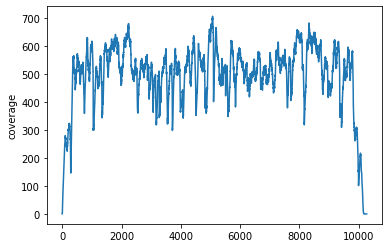

In [ ]:
sns.lineplot(data=df, x=df.index, y=df['coverage'])


In [ ]:
!gunzip ref.fasta.gz

gzip: ref.fasta.gz: No such file or directory


In [ ]:
with open('fr_alignment.sam', 'r') as f:
    l = [line.strip() for line in f]
    n = lenth('ref.fasta')
    s = [0] * n
    for i in range(3, len(l)):
      a = l[i].split('\t')
      if int(a[1]) in straight:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[i] += 1
      elif int(a[1]) in revers:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[n - i - 1] += 1
    df = pd.DataFrame()
    df['coverage'] = s

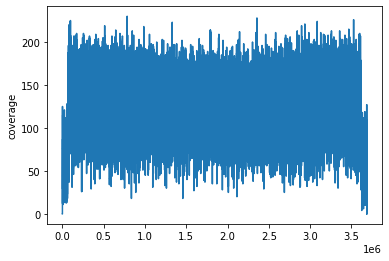

In [ ]:
sns.lineplot(data=df, x=df.index, y=df['coverage'])


In [ ]:
prop = (len(s) - s.count(0)) / len(s)
prop

0.999998915208345

In [ ]:
meanzn = np.mean(s)
meanzn

128.41251046823947

In [ ]:
with open('jump_alignment.sam', 'r') as f:
    l = [line.strip() for line in f]
    n = lenth('ref.fasta')
    s = [0] * n
    for i in range(3, len(l)):
      a = l[i].split('\t')
      if int(a[1]) in straight:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[i] += 1
      elif int(a[1]) in revers:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[n - i - 1] += 1
    df = pd.DataFrame()
    df['coverage'] = s

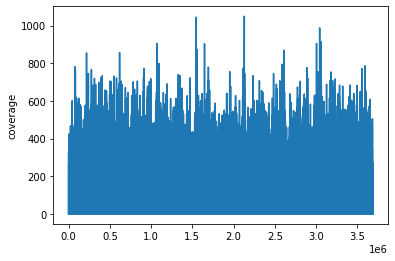

In [ ]:
sns.lineplot(data=df, x=df.index, y=df['coverage'])


In [ ]:
prop = (len(s) - s.count(0)) / len(s)
prop

0.9094079641064137

In [ ]:
meanzn = np.mean(s)
meanzn

120.65565783935537

Итоговая табличка с результатами


In [ ]:
data = {'Среднее покрытие':[128.41,
                             120.65],
        
        'Доля покрытой области генома':['0.999',
                              '0.909']}

df = pd.DataFrame(data, index =['frag_alignment.sam',
                                'jump_alignment.bam'])
df

,Среднее покрытие,Доля покрытой области генома
frag_alignment.sam,128.41,0.999
jump_alignment.bam,120.65,0.909


# 2. Распределение расстояния вставки

In [ ]:
!samtools stats test_alignment_sorted.bam | grep IS > test_stats.txt

In [ ]:
!head test_stats.txt

# Insert sizes. Use `grep ^IS | cut -f 2-` to extract this part. The columns are: insert size, pairs total, inward oriented pairs, outward oriented pairs, other pairs
IS	0	0	0	0	0
IS	1	0	0	0	0
IS	2	0	0	0	0
IS	3	0	0	0	0
IS	4	0	0	0	0
IS	5	0	0	0	0
IS	6	0	0	0	0
IS	7	0	0	0	0
IS	8	0	0	0	0


In [ ]:
with open('test_stats.txt', 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    for i in range(1, len(l)):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      COUNT[i - 1] = int(a[2])
df = pd.DataFrame()
df['insert size'] = IS
df['count'] = COUNT

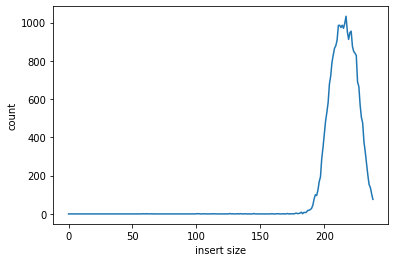

In [ ]:
sns.lineplot(data=df, x=df['insert size'], y=df['count'])


График полученный при помощи samtools stats.

In [ ]:
with open('test_alignment.sam', 'r') as f:
    l = [line.strip() for line in f]
    s = []
    for i in range(3, len(l)):
      a = l[i].split('\t')
      s.append(abs(int(a[8])))
    df = pd.DataFrame()
    df['Расстояние вставки'] = s
    df['count'] = 1
DF = df.groupby('Расстояние вставки').count()
DF

,count
Расстояние вставки,
58,2
60,2
62,2
65,2
100,2
...,...
246,26
247,16
248,16


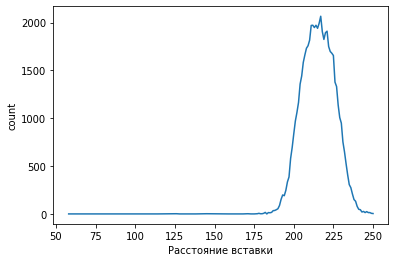

In [ ]:
sns.lineplot(data=DF, x=DF.index, y=DF['count'])

График по столбцу Template Length or TLEN .sam файла. Отличается от верхнего вдвое (каждое расстояние между парой ридов считается дважды). Поскольку до конца неясно, что требуется в задании, то для каждого файла оставлю два графика

In [ ]:
!samtools stats fr_alignment_sorted.bam | grep IS > fr_stats.txt

In [ ]:
!head fr_stats.txt

# Insert sizes. Use `grep ^IS | cut -f 2-` to extract this part. The columns are: insert size, pairs total, inward oriented pairs, outward oriented pairs, other pairs
IS	0	135	52	48	35
IS	1	0	0	0	0
IS	2	0	0	0	0
IS	3	0	0	0	0
IS	4	0	0	0	0
IS	5	0	0	0	0
IS	6	0	0	0	0
IS	7	0	0	0	0
IS	8	0	0	0	0


In [ ]:
!head fr_alignment.sam

@HD	VN:1.0	SO:unsorted
@SQ	SN:Contig184	LN:3614991
@PG	ID:bowtie2	PN:bowtie2	VN:2.3.5.1	CL:"/usr/local/bin/bowtie2-align-s --wrapper basic-0 -x chromosome_index -1 frag.R1.fastq.gz -2 frag.R2.fastq.gz"
2069:1:1208:3689:178475	83	Contig184	3167909	23	16M1D134M	=	3167855	-205	GCTGCCTCCCCCCCCGGGTTGGGGTCGTGCTCACGGCGCTGATCTTCGTGATCAACGTGGGCGTGACCCGGATCGGGGAGCGGCAGTCATGAGGGTCTCCCGCGCCGAGACGACGATGAACTACGTGCTCCTGCTGGGCTTCGCCGCCTT	BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBb_Y]TVa_WXJGG[WP`acaac`T][TH_aca[TTaacccaaacccccbbbacbccccccccccccccccb`bedegfgfgggdgihffhfhhgfiiiigfgfgeeeeebbb	AS:i:-48	XN:i:0	XM:i:8	XO:i:1	XG:i:1	NM:i:9	MD:Z:1T0C1G4G2T3^C3C1C1A126	YS:i:-25	YT:Z:CP
2069:1:1208:3689:178475	163	Contig184	3167855	23	150M	=	3167909	205	ACCACCACCGTGCCCAGCTTCGAGGTGTACTTCCGGGCGTTCGAGCTGCGCGCCGTCGGCTCCGCCTCCGCGGTCGCGATCGTGCTCACGGCGCTGCTCTTCGTGATCAACGTGGGCGTGACCCGGATCGTGGGGCGGCAGTCATCACGG	abbeeeeegfeggffdhh`ggh\fg_b^effhhiiiiiiihhiiddgdeabccccacccc_acc]aaccaZa_]TET_a]_c`^^GJS]^X[[_RMES_b]b^[^BBBBBBBBBB

In [ ]:
with open('fr_stats.txt', 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    for i in range(1, len(l)):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      COUNT[i - 1] = int(a[2])
df = pd.DataFrame()
df['insert size'] = IS
df['count'] = COUNT

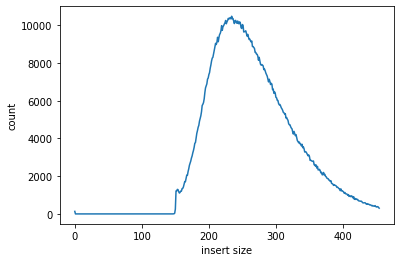

In [ ]:
sns.lineplot(data=df, x=df['insert size'], y=df['count'])


График полученный при помощи samtools stats.

In [ ]:
!samtools stats jump_alignment_sorted.bam | grep IS > jump_stats.txt

In [ ]:
!head jump_stats.txt

# Insert sizes. Use `grep ^IS | cut -f 2-` to extract this part. The columns are: insert size, pairs total, inward oriented pairs, outward oriented pairs, other pairs
IS	0	50391	30626	5776	13989
IS	1	0	0	0	0
IS	2	0	0	0	0
IS	3	0	0	0	0
IS	4	0	0	0	0
IS	5	0	0	0	0
IS	6	0	0	0	0
IS	7	0	0	0	0
IS	8	0	0	0	0


In [ ]:
!tail jump_stats.txt

IS	7990	422	422	0	0
IS	7991	434	434	0	0
IS	7992	402	402	0	0
IS	7993	399	399	0	0
IS	7994	412	412	0	0
IS	7995	417	417	0	0
IS	7996	423	423	0	0
IS	7997	464	464	0	0
IS	7998	416	416	0	0
IS	7999	735418	603035	46872	85511


Заметим, что первое (0) и последнеднее (7999) расстояния вставки имеют экстремальные значения, мы уберём их с пониманием, что весь остальной график на их фоне, на самом деле, не так значителен.

In [ ]:
with open('jump_stats.txt', 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 3)
    COUNT = [0] * (len(l) - 3)
    for i in range(2, len(l) - 1):
      a = l[i].split('\t')
      IS[i - 2] = int(a[1])
      COUNT[i - 2] = int(a[2])
df = pd.DataFrame()
df['insert size'] = IS
df['count'] = COUNT

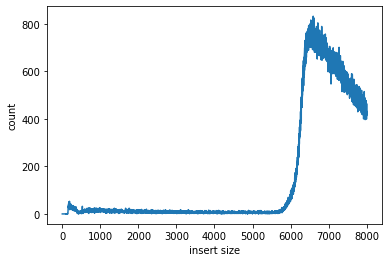

In [ ]:
sns.lineplot(data=df, x=df['insert size'], y=df['count'])


# 3. Частоты различных замен

In [ ]:
!samtools mpileup -f MG1655-K12.first10K.fasta -s test_alignment_sorted.bam > test_replace.txt

In [ ]:
!head -100 test_replace.txt 

In [ ]:
!samtools mpileup -f ref.fasta -s fr_alignment_sorted.bam > fr_replace.txt

In [ ]:
!head -50 MG1655-K12.first10K.fasta

>gi|49175990|ref|NC_000913.2| Escherichia coli str. K-12 substr. MG1655, complete genome, cropped to first 10000 nucleotides
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
TTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAA
TATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACC
ATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGCGTACAGGAAACACAGAAAAAAG
CCCGCACCTGACAGTGCGGGCTTTTTTTTTCGACCAAAGGTAACGAGGTAACAACCATGCGAGTGTTGAA
GTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCC
AGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTG
AAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTT
GACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTT
GCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGC
TGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGT
TACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCT
GAGTCCACCCGCCGTATTGCGGC

In [ ]:
!head -50 test_alignment.sam

@HD	VN:1.0	SO:unsorted
@SQ	SN:gi|49175990|ref|NC_000913.2|	LN:10000
@PG	ID:bowtie2	PN:bowtie2	VN:2.3.5.1	CL:"/usr/local/bin/bowtie2-align-s --wrapper basic-0 -x chromosome_index -1 test_1.fastq -2 test_2.fastq"
EAS20_8_6_1_6_1211	83	gi|49175990|ref|NC_000913.2|	8845	42	100M	=	8719	-226	TGGTTTCTGTATCTGAAATCTACCAGTACTACAAAGAGCACGGTTATGAAACCGTGGTTATGGGCGCAAGCTTCCGTAACATCGGCGAAATTCTGGAACT	@0=HAFHH3HHHFB-EFHHHHFFFFHHHF@HAHHHFHBHHDH@HHHHEHHB@DF?HGDGHHGHHHHIHHGHIHHHGHHHHHHHGIGHHHHGGHHHGHHGH	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:100	YS:i:0	YT:Z:CP
EAS20_8_6_1_6_1211/2	163	gi|49175990|ref|NC_000913.2|	8719	42	100M	=	8845	226	TCGCTCAGGCTCGTGCTTGTGCGGAAGCGGGCGTGTTCCTGATCTCGCCGTTTGTTGGCCGTATTCTTGACTGGTACAAAGCGAATACCGATAAGAAAGA	HHHHE=FFFGHHHGHHHFDFHEHHHFHHEF8BC<5BEHHDHDBFHHHHCG:FF3?B8EHBEEFEGCHG#<EH>?>?=8E?EB:GEEC3BA??3AC=EB,?	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:100	YS:i:0	YT:Z:CP
EAS20_8_6_1_9_1972/1	99	gi|49175990|ref|NC_000913.2|	205	42	94M	=	342	237	ACCACCATTACCACCACCATCACCA

In [ ]:
with open('test_alignment.sam', 'r') as f:
    l = [line.strip() for line in f]
    df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
    with open('MG1655-K12.first10K.fasta') as ref:
      lref = [line.strip() for line in ref]
      seq_ref = ''
      k = 0
      for i in range(1, len(lref)):
        seq_ref += lref[i]
      for i in range(3, len(l)):
        a = l[i].split('\t')
        seq = a[9]
        start = int(a[3]) - 1
        if int(a[1]) in straight or int(a[1]) in revers:
          for j in range(len(seq)): 
            if seq[j] != seq_ref[j + start]:
              df.loc[seq[j], seq_ref[j + start]] += 1
df

   A  T  C  G
A  0  0  0  0
T  0  0  0  0
C  0  0  0  0
G  0  0  0  0
[['A', 'T', 'C', 'G'], ['A', 'T', 'C', 'G']]


,A,T,C,G
A,0,0,0,0
T,1,0,2,34
C,15,1,0,22
G,20,17,2,0


In [ ]:
!head -50 fr_alignment.sam

@HD	VN:1.0	SO:unsorted
@SQ	SN:Contig184	LN:3614991
@PG	ID:bowtie2	PN:bowtie2	VN:2.3.5.1	CL:"/usr/local/bin/bowtie2-align-s --wrapper basic-0 -x chromosome_index -1 frag.R1.fastq.gz -2 frag.R2.fastq.gz"
2069:1:1208:3689:178475	83	Contig184	3167909	23	16M1D134M	=	3167855	-205	GCTGCCTCCCCCCCCGGGTTGGGGTCGTGCTCACGGCGCTGATCTTCGTGATCAACGTGGGCGTGACCCGGATCGGGGAGCGGCAGTCATGAGGGTCTCCCGCGCCGAGACGACGATGAACTACGTGCTCCTGCTGGGCTTCGCCGCCTT	BBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBBb_Y]TVa_WXJGG[WP`acaac`T][TH_aca[TTaacccaaacccccbbbacbccccccccccccccccb`bedegfgfgggdgihffhfhhgfiiiigfgfgeeeeebbb	AS:i:-48	XN:i:0	XM:i:8	XO:i:1	XG:i:1	NM:i:9	MD:Z:1T0C1G4G2T3^C3C1C1A126	YS:i:-25	YT:Z:CP
2069:1:1208:3689:178475	163	Contig184	3167855	23	150M	=	3167909	205	ACCACCACCGTGCCCAGCTTCGAGGTGTACTTCCGGGCGTTCGAGCTGCGCGCCGTCGGCTCCGCCTCCGCGGTCGCGATCGTGCTCACGGCGCTGCTCTTCGTGATCAACGTGGGCGTGACCCGGATCGTGGGGCGGCAGTCATCACGG	abbeeeeegfeggffdhh`ggh\fg_b^effhhiiiiiiihhiiddgdeabccccacccc_acc]aaccaZa_]TET_a]_c`^^GJS]^X[[_RMES_b]b^[^BBBBBBBBBB

In [6]:
import pysam
import pandas as pd
import numpy as np

In [16]:
samfile = pysam.AlignmentFile('fr_alignment.sam', "r")
df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
pairs = []
for read in samfile.fetch():
    if not read.is_unmapped:
        ref = read.get_reference_sequence()
            
        for read_nucleotide_idx, _, ref_nucleotide in read.get_aligned_pairs(matches_only=True, with_seq=True):
                read_nucleotide = read.query[read_nucleotide_idx - read.query_alignment_start].upper()
                if read_nucleotide.upper() != ref_nucleotide.upper() and read_nucleotide.upper() != 'N':
                    pairs.append([read_nucleotide.upper(), ref_nucleotide.upper()])


In [18]:
AC = pairs.count(['A', 'C'])
AG = pairs.count(['A', 'G'])
AT = pairs.count(['A', 'T'])
CA = pairs.count(['C', 'A'])
CG = pairs.count(['C', 'G'])
CT = pairs.count(['C', 'T'])
GA = pairs.count(['G', 'A'])
GC = pairs.count(['G', 'C'])
GT = pairs.count(['G', 'T'])
TA = pairs.count(['T', 'A'])
TC = pairs.count(['T', 'C'])
TG = pairs.count(['T', 'G'])
print(AC, AG, AT, CA, CG, CT, GA, GC, GT, TA, TC, TG)

1132733 527321 234948 2298352 2222600 1464964 1477185 2229790 2314922 231225 523274 1136912


In [23]:
df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
df.loc['A', 'C'] = AC
df.loc['A', 'G'] = AG
df.loc['A', 'T'] = AT
df.loc['C', 'A'] = CA
df.loc['C', 'G'] = CG
df.loc['C', 'T'] = CT
df.loc['G', 'A'] = GA
df.loc['G', 'C'] = GC
df.loc['G', 'T'] = GT
df.loc['T', 'A'] = TA
df.loc['T', 'C'] = TC
df.loc['T', 'G'] = TG

df

,A,T,C,G
A,0,234948,1132733,527321
T,231225,0,523274,1136912
C,2298352,1464964,0,2222600
G,1477185,2314922,2229790,0


In [24]:
samfile = pysam.AlignmentFile('jump_alignment.sam', "r")
df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
pairs = []
for read in samfile.fetch():
    if not read.is_unmapped:
        ref = read.get_reference_sequence()
            
        for read_nucleotide_idx, _, ref_nucleotide in read.get_aligned_pairs(matches_only=True, with_seq=True):
                read_nucleotide = read.query[read_nucleotide_idx - read.query_alignment_start].upper()
                if read_nucleotide.upper() != ref_nucleotide.upper() and read_nucleotide.upper() != 'N':
                    pairs.append([read_nucleotide.upper(), ref_nucleotide.upper()])


In [25]:
AC = pairs.count(['A', 'C'])
AG = pairs.count(['A', 'G'])
AT = pairs.count(['A', 'T'])
CA = pairs.count(['C', 'A'])
CG = pairs.count(['C', 'G'])
CT = pairs.count(['C', 'T'])
GA = pairs.count(['G', 'A'])
GC = pairs.count(['G', 'C'])
GT = pairs.count(['G', 'T'])
TA = pairs.count(['T', 'A'])
TC = pairs.count(['T', 'C'])
TG = pairs.count(['T', 'G'])
print(AC, AG, AT, CA, CG, CT, GA, GC, GT, TA, TC, TG)

227204 127226 81850 1233853 860601 809054 823224 872249 1250129 81971 127835 228243


In [26]:
df = pd.DataFrame(np.zeros((4, 4)).astype(int), index = ['A', 'T', 'C', 'G'], columns = ['A', 'T', 'C', 'G'])
df.loc['A', 'C'] = AC
df.loc['A', 'G'] = AG
df.loc['A', 'T'] = AT
df.loc['C', 'A'] = CA
df.loc['C', 'G'] = CG
df.loc['C', 'T'] = CT
df.loc['G', 'A'] = GA
df.loc['G', 'C'] = GC
df.loc['G', 'T'] = GT
df.loc['T', 'A'] = TA
df.loc['T', 'C'] = TC
df.loc['T', 'G'] = TG

df

,A,T,C,G
A,0,81850,227204,127226
T,81971,0,127835,228243
C,1233853,809054,0,860601
G,823224,1250129,872249,0


#Часть 2: анализ ридов IonTorrent
##  Статистика ридов IonTorrent

***test***

In [5]:
download_from_disk('13fMOQtaR0hvL4a1XOj8Ufpa3Op54WtFN')

Downloading...
From: https://drive.google.com/uc?id=13fMOQtaR0hvL4a1XOj8Ufpa3Op54WtFN&confirm=t
To: /content/test.fastq
100%|██████████| 171k/171k [00:00<00:00, 1.87MB/s]


In [6]:
download_from_disk('1nbAgPD4qNn_I3SfQDr5AcDfg2WzYLGBp')

Downloading...
From: https://drive.google.com/uc?id=1nbAgPD4qNn_I3SfQDr5AcDfg2WzYLGBp&confirm=t
To: /content/test_reference.fasta
100%|██████████| 7.07M/7.07M [00:00<00:00, 31.8MB/s]


***Реальные данные***

In [100]:
download_from_disk('1Tu1EyQP45Wu-ibgUnf7Pw73UGpqQcyDp')

Downloading...
From: https://drive.google.com/uc?id=1Tu1EyQP45Wu-ibgUnf7Pw73UGpqQcyDp&confirm=t
To: /content/B22-730.fastq.gz
100%|██████████| 97.4M/97.4M [00:03<00:00, 31.3MB/s]


In [8]:
download_from_disk('194itwrkAOCd73oyYrO2E7spO_LyOtWz1')

Downloading...
From: https://drive.google.com/uc?id=194itwrkAOCd73oyYrO2E7spO_LyOtWz1&confirm=t
To: /content/C24-698.fastq.gz
100%|██████████| 97.4M/97.4M [00:04<00:00, 23.7MB/s]


***Референсный геном***

In [101]:
download_from_disk('1FKWaB4kcMtZWitippiOd_hRejwnyPYWD')

Downloading...
From: https://drive.google.com/uc?id=1FKWaB4kcMtZWitippiOd_hRejwnyPYWD&confirm=t
To: /content/DH10B-K12.fasta
100%|██████████| 4.75M/4.75M [00:00<00:00, 22.2MB/s]


In [102]:
!bwa index DH10B-K12.fasta

[bwa_index] Pack FASTA... 0.05 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 1.53 seconds elapse.
[bwa_index] Update BWT... 0.03 sec
[bwa_index] Pack forward-only FASTA... 0.03 sec
[bwa_index] Construct SA from BWT and Occ... 0.59 sec
[main] Version: 0.7.17-r1188
[main] CMD: bwa index DH10B-K12.fasta
[main] Real time: 2.328 sec; CPU: 2.266 sec


In [103]:
!bwa mem DH10B-K12.fasta B22-730.fastq.gz > tor_test_alignment.sam

[M::bwa_idx_load_from_disk] read 0 ALT contigs
[M::process] read 30580 sequences (10000589 bp)...
[M::process] read 30700 sequences (10000499 bp)...
[M::mem_process_seqs] Processed 30580 reads in 6.075 CPU sec, 5.930 real sec
[M::process] read 30654 sequences (10000464 bp)...
[M::mem_process_seqs] Processed 30700 reads in 6.598 CPU sec, 6.341 real sec
[M::process] read 30558 sequences (10000069 bp)...
[M::mem_process_seqs] Processed 30654 reads in 7.203 CPU sec, 6.975 real sec
[M::process] read 30468 sequences (10000148 bp)...
[M::mem_process_seqs] Processed 30558 reads in 5.566 CPU sec, 5.319 real sec
[M::process] read 30596 sequences (10000413 bp)...
[M::mem_process_seqs] Processed 30468 reads in 5.556 CPU sec, 5.307 real sec
[M::process] read 30514 sequences (10000381 bp)...
[M::mem_process_seqs] Processed 30596 reads in 6.039 CPU sec, 5.784 real sec
[M::process] read 30520 sequences (10000266 bp)...
[M::mem_process_seqs] Processed 30514 reads in 5.354 CPU sec, 5.115 real sec
[M::pr

In [107]:
!samtools sort tor_test_alignment.sam > tor_test_sorted.bam

In [108]:
!samtools index tor_test_sorted.bam

In [109]:
!head tor_test_alignment.sam

@SQ	SN:gi|170079663|ref|NC_010473.1|	LN:4686137
@PG	ID:bwa	PN:bwa	VN:0.7.17-r1188	CL:bwa mem DH10B-K12.fasta B22-730.fastq.gz
LJKEP:00525:00022	0	gi|170079663|ref|NC_010473.1|	1	60	57S46M1D210M1I28M3S	*	0	0	GCTGCATGATATTGAAAAAATATCACCAAATAAAAAACGCCTTAGTAAGTATTTTTCAGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAGAGTGTCTGATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATATAGGCATAGCGCACAGACAGATAAAAATTACAGAGTACACAACATCCATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGACGACGTACAGGAAACACAGAAAAAAGCCCGCTAC	@C@A>>9444499444444(4999AB6991999999*444:;@BBBD@BCCCBBA/@@@9999/9B@@DDCA@9<<969AC>BB?CBBBC<<;ACC?@;66=361111(1661178865500//..8<CAAA>A9948?@?>@@<;===9865922,---+-44.//,.66659A>:=;;::=;=A===9=@CEA;<<@883<AAAAB?>=B?77;;00055::-/-0:><?;9;=10.:....,4;=:==AB??><;;79488;2442348==?AA>A;;=>48827717<3.,.4444,.....+,054.......38=<==;<<<8845775*.--+----3	NM:i:2	MD:Z:46^A238	AS:i:270	XS:i:0	SA:Z:gi|170079663|ref|NC_010473.1|,4686080,+,14M1D43M288S,60,1;
L

In [113]:
flags('tor_test_alignment.sam')

{'0', '16', '2048', '2064', '4'}

In [114]:
with open('tor_test_alignment.sam', 'r') as f:
    l = [line.strip() for line in f]
    n = lenth('DH10B-K12.fasta')
    s = [0] * n
    for i in range(3, len(l)):
      a = l[i].split('\t')
      if int(a[1]) != 4:
        for i in range(int(a[3]) + 1, int(a[3]) + len(a[9]) + 1):
          s[i] += 1
    df = pd.DataFrame()
    df['coverage'] = s

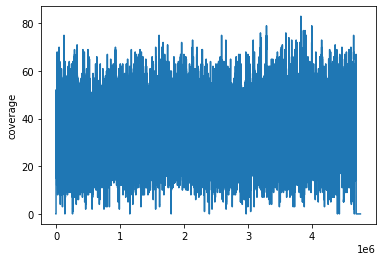

In [115]:
sns.lineplot(data=df, x=df.index, y=df['coverage'])


In [83]:
prop = (len(s) - s.count(0)) / len(s)
print('Процент покрытого генома')
prop

Процент покрытого генома


0.9860813269760496

In [84]:
meanzn = np.mean(s)
print('Среднее покрытие')
meanzn

Среднее покрытие


58.868800338636234

In [85]:
!samtools stats tor_test_alignment_sorted.bam | grep ID > tor_stats_stats.txt

In [86]:
!head tor_stats_stats.txt

# Indel distribution. Use `grep ^ID | cut -f 2-` to extract this part. The columns are: length, number of insertions, number of deletions
ID	1	624458	490436
ID	2	51245	27014
ID	3	7445	2243
ID	4	2497	315
ID	5	1094	83
ID	6	686	14
ID	7	426	2
ID	8	287	5
ID	9	212	0


In [87]:
with open('tor_stats_stats.txt', 'r') as f:
    l = [line.strip() for line in f]
    IS = [0] * (len(l) - 1)
    COUNT = [0] * (len(l) - 1)
    sum_DEL = 0
    count_DEL = 0
    sum_INS = 0
    count_INS = 0
    for i in range(1, len(l)):
      a = l[i].split('\t')
      IS[i - 1] = int(a[1])
      sum_DEL += int(a[1]) * int(a[2])
      sum_INS += int(a[1]) * int(a[3])
      count_DEL += int(a[2])
      count_INS += int(a[3])
      COUNT[i - 1] = int(a[2]) + int(a[3])
mean_DEL = sum_DEL / count_DEL
mean_INS = sum_INS / count_INS
print(mean_DEL, mean_INS)
df = pd.DataFrame()
df['ins/del size'] = IS
df['count'] = COUNT

1.140254176408354 1.0633072749435701


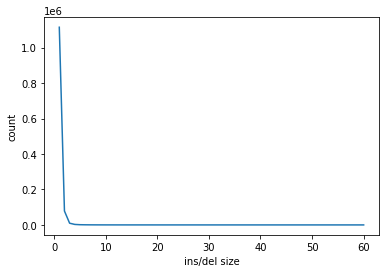

In [88]:
sns.lineplot(data=df, x=df['ins/del size'], y=df['count'])


In [90]:
!cat tor_test_alignment.sam | cut -s -f 6 | grep -v '*' > CIGAR.txt

In [91]:
import re

In [94]:
CIGAR = {"M":0, 'S':0, 'H':0, 'D':0,'I':0}
errors = 0
for cigarette in cigarettes:
    string = cigarette.rstrip()
    matches = re.findall(r'(\d+)([A-Z]{1})', string)
    length = 0
    error = 0
    for match in matches:
        CIGAR[match[1]] += int(match[0])
        length += int(match[0])
        if match[1] == 'D' or match[1] == 'I' or match[1] == 'X':
            error += int(match[0])
    if length != 0:
        errors += error/length
    else:
        bias += 1
errors /= len(cigarettes)

In [104]:
print('Средний процент ошибок в ридах')
errors

Средний процент ошибок в ридах


0.005150210519290204